<a href="https://colab.research.google.com/github/FahmidaNourin/Light_Sleep_And_Deep_Sleep_Classification/blob/main/Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#connecting with drive

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
import numpy as np
import pandas as pd
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tqdm.notebook import tqdm

df = pd.read_csv("/content/drive/MyDrive/Sleep_Research/draft/HMC_Sleep_Stages.csv")

In [71]:
df =df.replace("N1", "Light_Sleep")
df =df.replace("N2", "Light_Sleep")
df =df.replace("N3", "Deep_Sleep")
df.drop(df.index[df['Sleep_Stage'] == "R"], inplace = True)
df.drop(df.index[df['Sleep_Stage'] == "W"], inplace = True)


In [72]:
df.head()

,Subject,Sleep_Stage,Epoch,MeanP_Alpha_F4,MedianF_Alpha_F4,MeanF_Alpha_F4,SpectralEdge_Alpha_F4,PeakF_Alpha_F4,MeanP_Beta_F4,MedianF_Beta_F4,...,MeanP_Delta_O2,MedianF_Delta_O2,MeanF_Delta_O2,SpectralEdge_Delta_O2,PeakF_Delta_O2,MeanP_Gamma_O2,MedianF_Gamma_O2,MeanF_Gamma_O2,SpectralEdge_Gamma_O2,PeakF_Gamma_O2
0,SN002,Light_Sleep,6,0.00034,10.11512,17.85756,17.48293,10.24000,0.00047,17.73268,...,0.00112,0.74927,6.36878,2.87220,0.62439,0.000076,32.71805,43.83220,49.95122,49.95122
1,SN002,Light_Sleep,7,0.00035,10.73951,17.60780,17.10829,9.11610,0.00048,16.85854,...,0.00070,0.99902,6.86829,3.62146,0.74927,0.000072,32.09366,44.33171,49.95122,49.95122
2,SN002,Light_Sleep,8,0.00035,9.36585,17.60780,16.98341,9.24098,0.00042,17.35805,...,0.00077,1.49854,6.49366,4.12098,0.74927,0.000069,33.09268,43.95707,49.95122,49.95122
3,SN002,Light_Sleep,116,0.00054,9.74049,15.98439,15.48488,8.36683,0.00051,14.61073,...,0.00082,0.87415,7.49268,3.49659,0.87415,0.000039,28.34732,43.08293,49.95122,49.95122
4,SN002,Light_Sleep,117,0.00034,10.11512,16.48390,15.98439,12.23805,0.00034,15.11024,...,0.00084,0.87415,6.86829,2.87220,0.62439,0.000032,28.97171,43.20780,49.95122,49.95122


In [73]:
df.shape

(72631, 78)

In [74]:
df = df.loc[:,df.columns != "Subject"]
df = df.loc[:,df.columns != "Epoch"]


In [75]:
df.shape

(72631, 76)

In [76]:
target="Sleep_Stage"

In [77]:
from sklearn.preprocessing import LabelEncoder
encd = LabelEncoder()
df[target] = encd.fit_transform(df[target])

In [78]:
df[target].value_counts()

1    51341
0    21290
Name: Sleep_Stage, dtype: int64

In [79]:
from scipy.stats import pearson3
X = df.loc[:,df.columns != target]

y = df[target]




#Feature Selection: ANOVA

In [80]:

from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import pandas as pd


def anova(X,y,num_of_feat):
  fs = SelectKBest(score_func=f_classif, k=5)
  fit = fs.fit(X,y)
  dfscores = pd.DataFrame(fit.scores_)
  dfcolumns = pd.DataFrame(X.columns)

  featureScores = pd.concat([dfcolumns,dfscores],axis=1)

  featureScores.columns = ['Best_columns','Score_ANOVA']

  lyst = featureScores.nlargest(num_of_feat,'Score_ANOVA')
  ANOVA_feature=list(lyst['Best_columns'])
  return ANOVA_feature


#Pearson’s

In [81]:

from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


def pearson(X,y,num_of_feat):
  fs = SelectKBest(score_func=f_regression, k=5)
  fit = fs.fit(X,y)

  #create df for scores
  dfscores = pd.DataFrame(fit.scores_)
  #create df for column names
  dfcolumns = pd.DataFrame(df.columns)
  #concat two dataframes for better visualization
  featureScores = pd.concat([dfcolumns,dfscores],axis=1)
  #naming the dataframe columns
  featureScores.columns = ['Best_columns','Score_pearsons']

  #print 10 best features
  lyst = featureScores.nlargest(num_of_feat,'Score_pearsons')

  PEARSON_feature=list(lyst['Best_columns'])
  return PEARSON_feature


#Univarient Feature Selection

In [82]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

def u_f(X,y,num_of_feat):
  bestfeatures = SelectKBest(score_func=chi2, k=10)
  fit = bestfeatures.fit(X,y)

  dfscores = pd.DataFrame(fit.scores_)
  dfcolumns = pd.DataFrame(X.columns)


  #concat two dataframes for better visualization
  featureScores = pd.concat([dfcolumns,dfscores],axis=1)
  featureScores.columns = ['Specs','Score']  #naming the dataframe columns



  sorted_df = featureScores.sort_values(by=['Score'], ascending=False)
  Univarient_feature = sorted_df["Specs"][:num_of_feat]
  return Univarient_feature

#Pearson Method

In [83]:
col_number = [10,15,20,25,30,35,40,45,50,55,60,65,70]
pear_train_accu = []
pear_valid_accu = []
pear_test_accu = []


for i in tqdm(col_number):

  col_name = pearson(df.loc[:,df.columns != target],df[target],i)
  X = df.loc[:,col_name]
  y = df[target]

  scaler = StandardScaler()
  scaler.fit(X)
  X[X.columns] = scaler.transform(X)

  X_train, X_test_val, y_train, y_test_val= train_test_split(X,y, test_size=0.3,random_state=42)
  X_test, X_val, y_test, y_val= train_test_split(X_test_val, y_test_val, train_size=.5, random_state=42)

  smote = SMOTE()
  X_train,y_train = smote.fit_resample(X_train,y_train)

  rf = RandomForestClassifier()
  rf.fit(X_train, y_train)
  y_pred_val = rf.predict(X_val)
  y_pred_train = rf.predict(X_train)
  y_pred_test = rf.predict(X_test)


  tr_accu = accuracy_score(y_train, y_pred_train)
  val_accu = accuracy_score(y_val, y_pred_val)
  ts_accu = accuracy_score(y_test, y_pred_test)

  pear_train_accu.append(tr_accu)
  pear_valid_accu.append(val_accu)
  pear_test_accu.append(ts_accu)

  print("-----------------------------------------------------------------------")
  print("Number of Features: ",i)
  print("Training Accurecy: ",tr_accu)
  print("Validation Accurecy: ",val_accu)
  print("Testing Accurecy: ",ts_accu)
  print("-----------------------------------------------------------------------")


-----------------------------------------------------------------------
Training Accurecy:  0.9942544726078851
Validation Accurecy:  0.8456172556218449
Testing Accurecy:  0.842312987608995
-----------------------------------------------------------------------
-----------------------------------------------------------------------
Training Accurecy:  0.9941570907876798
Validation Accurecy:  0.8875631023405232
Testing Accurecy:  0.8858191831115191
-----------------------------------------------------------------------
-----------------------------------------------------------------------
Training Accurecy:  0.9941570907876798
Validation Accurecy:  0.8908673703533732
Testing Accurecy:  0.8968334098210188
-----------------------------------------------------------------------
-----------------------------------------------------------------------
Training Accurecy:  0.9942822959850867
Validation Accurecy:  0.8926112895823772
Testing Accurecy:  0.8982101881597063
-------------------------

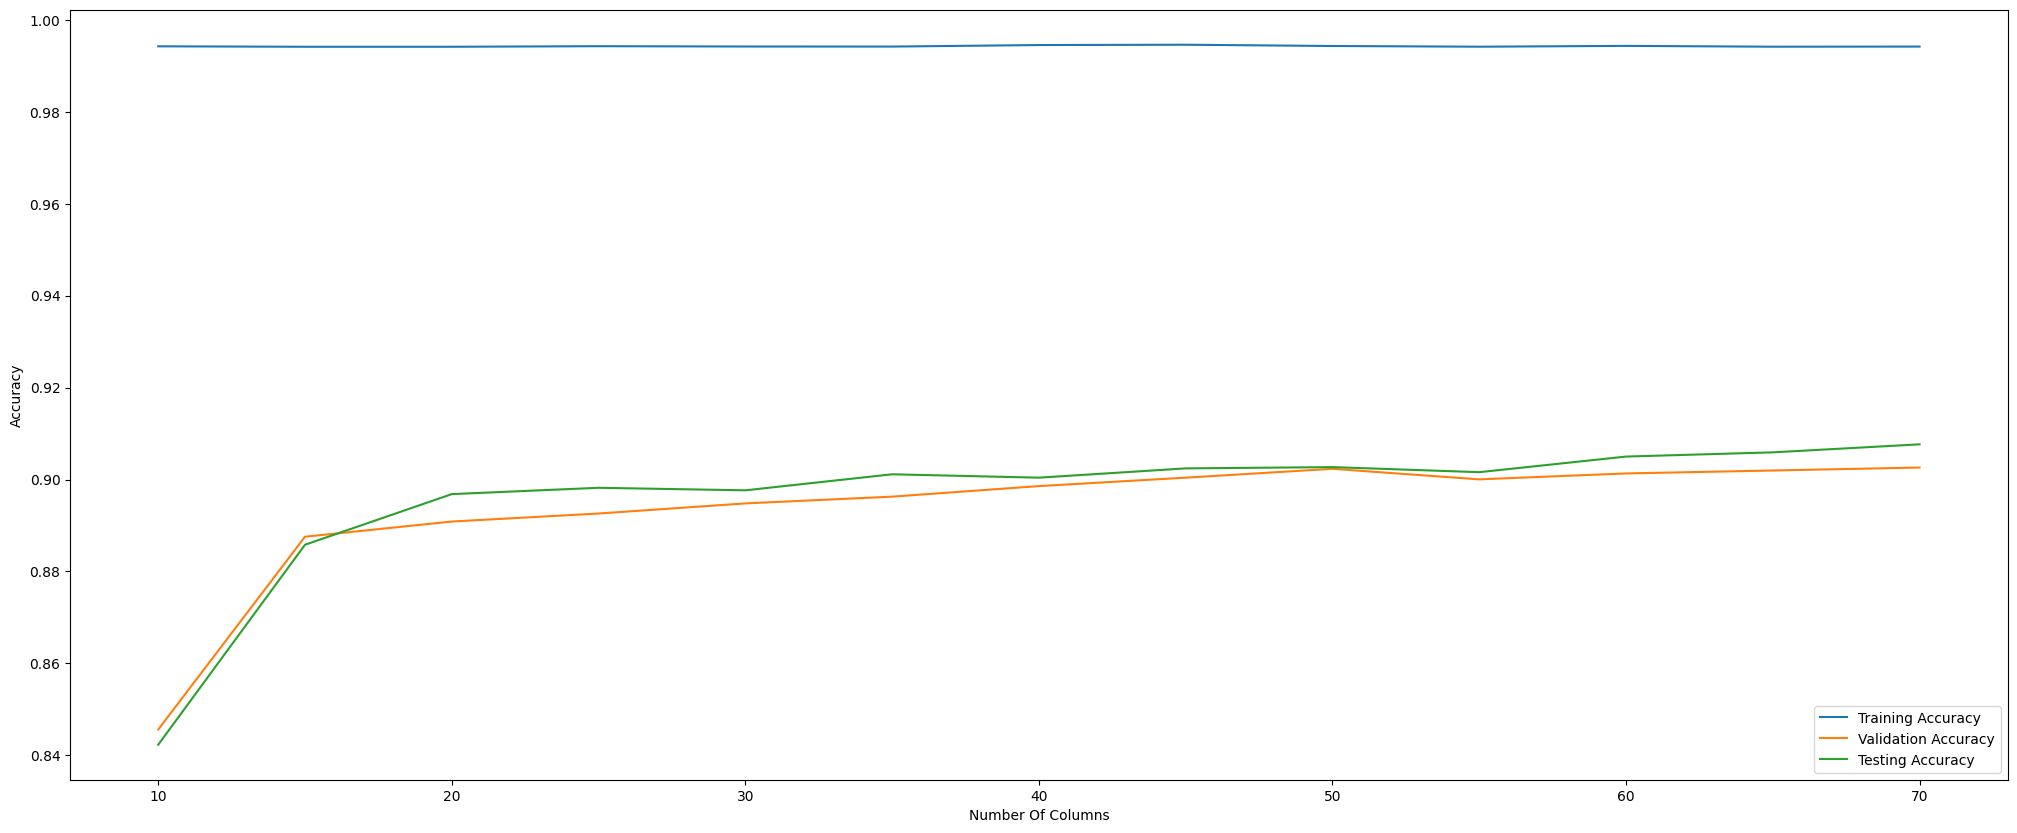

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (25,10))

plt.plot(col_number,pear_train_accu)
plt.plot(col_number,pear_valid_accu)
plt.plot(col_number,pear_test_accu)

plt.xlabel('Number Of Columns')
plt.ylabel ('Accuracy')
plt.legend(["Training Accuracy","Validation Accuracy","Testing Accuracy"], loc=0, frameon=True)

#Univarient Method

In [85]:
col_number = [10,15,20,25,30,35,40,45,50,55,60,65,70]
uf_train_accu = []
uf_valid_accu = []
uf_test_accu = []


for i in tqdm(col_number):

  col_name = u_f(df.loc[:,df.columns != target],df[target],i)
  X = df.loc[:,col_name]
  y = df[target]

  scaler = StandardScaler()
  scaler.fit(X)
  X[X.columns] = scaler.transform(X)

  X_train, X_test_val, y_train, y_test_val= train_test_split(X,y, test_size=0.3,random_state=42)
  X_test, X_val, y_test, y_val= train_test_split(X_test_val, y_test_val, train_size=.5, random_state=42)

  smote = SMOTE()
  X_train,y_train = smote.fit_resample(X_train,y_train)

  rf = RandomForestClassifier()
  rf.fit(X_train, y_train)
  y_pred_val = rf.predict(X_val)
  y_pred_train = rf.predict(X_train)
  y_pred_test = rf.predict(X_test)


  tr_accu = accuracy_score(y_train, y_pred_train)
  val_accu = accuracy_score(y_val, y_pred_val)
  ts_accu = accuracy_score(y_test, y_pred_test)

  uf_train_accu.append(tr_accu)
  uf_valid_accu.append(val_accu)
  uf_test_accu.append(ts_accu)

  print("-----------------------------------------------------------------------")
  print("Number of Features: ",i)
  print("Training Accurecy: ",tr_accu)
  print("Validation Accurecy: ",val_accu)
  print("Testing Accurecy: ",ts_accu)
  print("-----------------------------------------------------------------------")


  0%|          | 0/13 [00:00<?, ?it/s]

-----------------------------------------------------------------------
Number of Features:  10
Training Accurecy:  0.9926407167301967
Validation Accurecy:  0.8578246902248738
Testing Accurecy:  0.853510784763653
-----------------------------------------------------------------------
-----------------------------------------------------------------------
Number of Features:  15
Training Accurecy:  0.9940179739016722
Validation Accurecy:  0.8728774667278568
Testing Accurecy:  0.8721431849472235
-----------------------------------------------------------------------
-----------------------------------------------------------------------
Number of Features:  20
Training Accurecy:  0.9944909713140981
Validation Accurecy:  0.8791188618632401
Testing Accurecy:  0.8791188618632401
-----------------------------------------------------------------------
-----------------------------------------------------------------------
Number of Features:  25
Training Accurecy:  0.9946996466431095
Validati

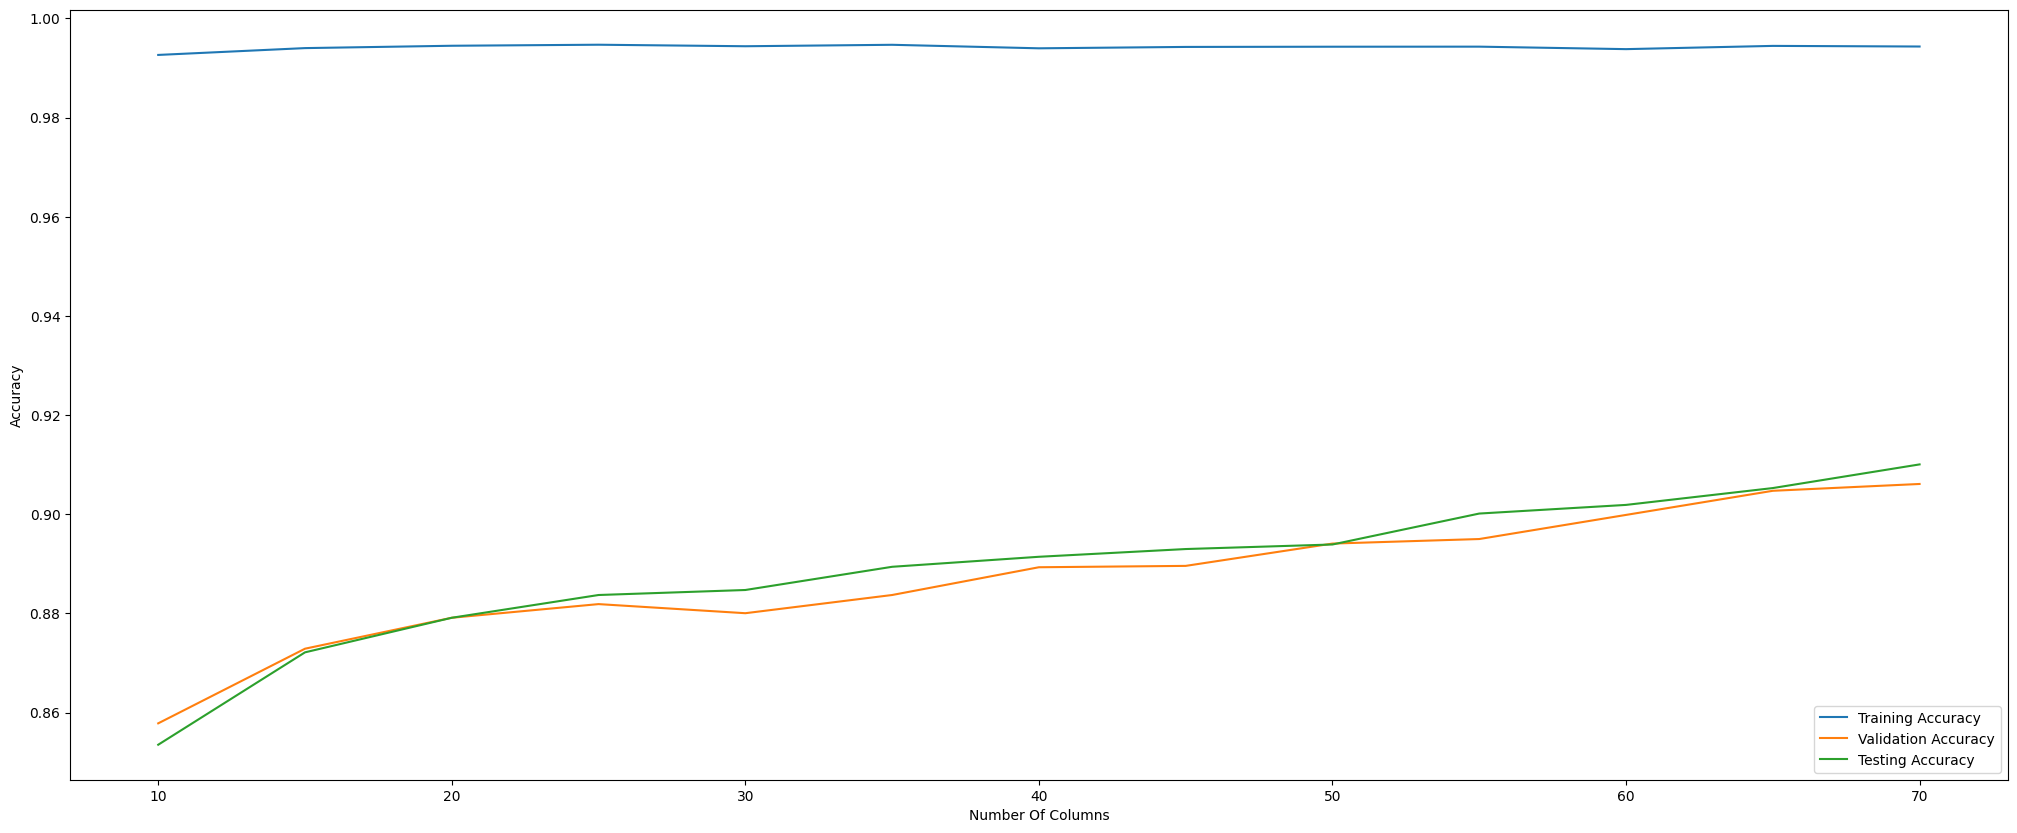

In [86]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize = (25,10))

plt.plot(col_number,uf_train_accu)
plt.plot(col_number,uf_valid_accu)
plt.plot(col_number,uf_test_accu)

plt.xlabel('Number Of Columns')
plt.ylabel ('Accuracy')
plt.legend(["Training Accuracy","Validation Accuracy","Testing Accuracy"], loc=0, frameon=True)